<a href="https://colab.research.google.com/github/jeffeuxMartin/Jeffeux_Linghack_2021/blob/main/Remake_Linghacks_NTU_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#region
from io import StringIO
import numpy as np, pandas as pd

data_csv = ('''index_C,Chintang_in_IPA,i'''
    '''ndex_E,English_translation''''\n'
    '''1,cuwa uthurumbeʔ yuŋno,a,There i'''
    '''s a hole in the towel.''''\n'
    '''2,appa chintaŋbeʔ yuŋno,b,The wom'''
    '''an has gone away.''''\n'
    '''3,sencak sie,c,The rice has been '''
    '''cooked.''''\n'
    '''4,wapaŋa topi wadaŋse,d,There is '''
    '''a hat on the head.''''\n'
    '''5,kok thuktaŋse,e,My mother-in-la'''
    '''w slept.''''\n'
    '''6,ram harinɨŋ khoŋno,f,You go to '''
    '''the market.''''\n'
    '''7,kʌp kedadaŋse,g,The water is in'''
    ''' his mouth.''''\n'
    '''8,taŋbeʔ topi yuŋno,h,Joge sent a'''
    ''' leter.''''\n'
    '''9,menwaŋa sencak sede,i,The mouse'''
    ''' died.''''\n'
    '''10,tawelbeʔ uhoŋ yuŋno,j,The woma'''
    '''n has bought a chicken.''''\n'
    '''11,anambaŋa cuwa thuŋno,k,The cup'''
    ''' has been broken.''''\n'
    '''12,mechacha khadaŋse,l,My father '''
    '''is in Chintang.''''\n'
    '''13,jogeŋa cithi hakte,m,The roost'''
    '''er has put on a hat.''''\n'
    '''14,anamma imse,n,A cat killed a m'''
    '''ouse.''''\n'
    '''15,hana bajar akhaʔno,o,Ram plays'''
    ''' with Hari.''''\n'
    '''16,mechachaŋa wa khedoŋse,p,My fa'''
    '''ther-in-law drinks water.''''\n'
    '''17,topibeʔ menwa yuŋno,q,Joge pla'''
    '''ys with a chicken.''''\n'
    '''18,joge wanɨŋ khoŋno,r,There is r'''
    '''ice in my mouth.''''\n'
    '''19,awama bajarbeʔ yuŋno,s,My moth'''
    '''er-in-law is with my mother.''''\n'
    '''20,nam,t,My hen is in th'''
    '''e market.''''\n'
    '''21,athurumbeʔ kok yuŋno,'''
    '''u,My father went away.''''\n'
    '''22,appa khade,v,parent-i'''
    '''n-law''''\n'
    '''23,anamma ammanɨŋ yuŋno,'''
    '''w,There is a cat in a hat.''')


data_df = pd.read_csv(StringIO(data_csv))

*english, = data_df['English_translation']
*chintang, = data_df['Chintang_in_IPA']
#endregion

In [9]:
%%capture
%pip install -U transformers

In [18]:
!TZ=Asia/Taipei date

Fri 17 Mar 2023 08:35:25 AM CST


In [10]:
%%capture
!nvidia-smi

In [11]:
from transformers import AutoModel, AutoTokenizer

In [12]:
import torch

device = ['cpu', 'cuda'][torch.cuda.is_available()]
tokenizer = AutoTokenizer.from_pretrained(
    'bert-base-uncased')
model = AutoModel.from_pretrained(
    'bert-base-uncased').to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
english_token_tensors = tokenizer(
    english, return_tensors='pt', padding=True)

In [21]:
english[0]

'There is a hole in the towel.'

In [23]:
# english_tokens
[tokenizer.tokenize(s) for s in english]

[['there', 'is', 'a', 'hole', 'in', 'the', 'towel', '.'],
 ['the', 'woman', 'has', 'gone', 'away', '.'],
 ['the', 'rice', 'has', 'been', 'cooked', '.'],
 ['there', 'is', 'a', 'hat', 'on', 'the', 'head', '.'],
 ['my', 'mother', '-', 'in', '-', 'law', 'slept', '.'],
 ['you', 'go', 'to', 'the', 'market', '.'],
 ['the', 'water', 'is', 'in', 'his', 'mouth', '.'],
 ['jo', '##ge', 'sent', 'a', 'let', '##er', '.'],
 ['the', 'mouse', 'died', '.'],
 ['the', 'woman', 'has', 'bought', 'a', 'chicken', '.'],
 ['the', 'cup', 'has', 'been', 'broken', '.'],
 ['my', 'father', 'is', 'in', 'chin', '##tang', '.'],
 ['the', 'rooster', 'has', 'put', 'on', 'a', 'hat', '.'],
 ['a', 'cat', 'killed', 'a', 'mouse', '.'],
 ['ram', 'plays', 'with', 'hari', '.'],
 ['my', 'father', '-', 'in', '-', 'law', 'drinks', 'water', '.'],
 ['jo', '##ge', 'plays', 'with', 'a', 'chicken', '.'],
 ['there', 'is', 'rice', 'in', 'my', 'mouth', '.'],
 ['my', 'mother', '-', 'in', '-', 'law', 'is', 'with', 'my', 'mother', '.'],
 ['my',

In [35]:
!TZ=Asia/Taipei date

Fri 17 Mar 2023 08:41:35 AM CST


In [ ]:
%pip install fasttext

{'q', 'z', 'x', 'f', 'v'}


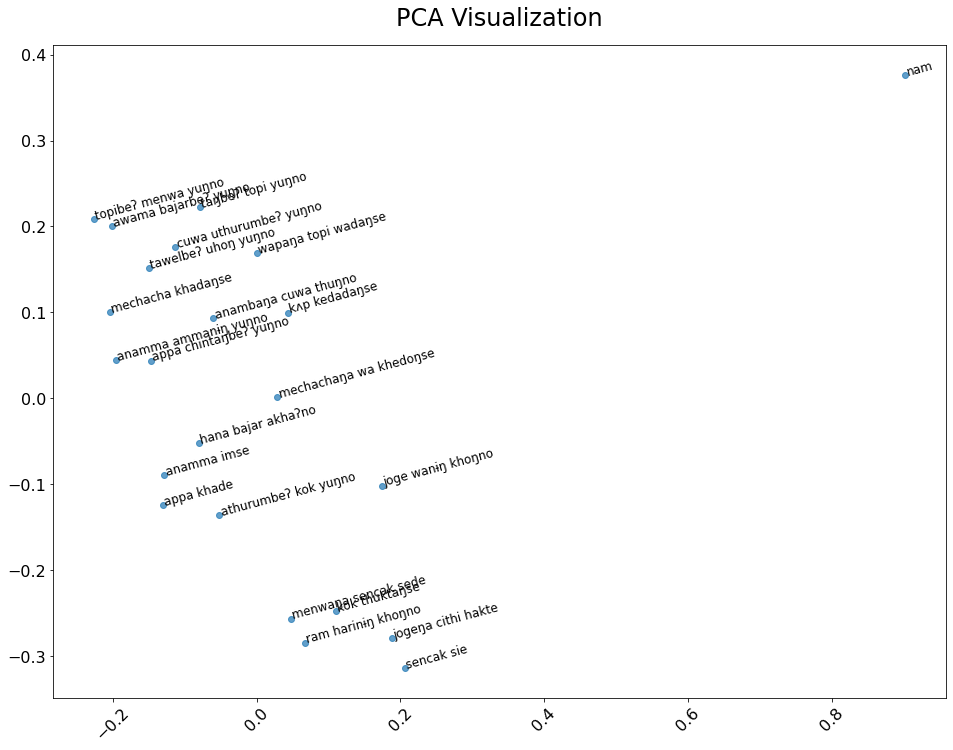

In [96]:
#region
import fasttext

# %%
charset_chintang = sorted(set(''.join(chintang)))
# charset_english = (
#     sorted(set(''.join(english).lower())))
charset_english = ''.join(
    [chr(ord('a') + i) for i in range(26)])
print(set(charset_english) - set(charset_chintang))
for c in 'qzxfv': assert c not in charset_chintang
replace_dict = {
 'ŋ': 'q',
 'ɨ': 'z',
 'ʌ': 'v',
 'ʔ': 'x',
}

# %%
import fasttext, os
tmpfile = 'data.txt'
while os.path.isfile(tmpfile): tmpfile = f'd{tmpfile}'

text_corpus = '\n'.join(chintang)
# for key, val in replace_dict.items():
#     text_corpus = text_corpus.replace(key, val)

with open(tmpfile, 'w') as f:
    print(text_corpus, file=f)
#endregion
#region
# Skipgram model :
ft_model = fasttext.train_unsupervised(
    tmpfile, 
    model='skipgram',
    minCount=1,
    verbose=True,
    epoch=500,
)
#endregion
#region
os.remove(tmpfile)

vocab_chintang = ft_model.words

sent_vecs_chin = [ft_model.get_sentence_vector(
    sent
) for sent in chintang]
#endregion
#region
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def dimension_reduction_by_pca(input_vectors):
    # specify the number of principal 
    #     components to retain
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(input_vectors)
    return reduced_vectors

sent_vecs_chin_2d = dimension_reduction_by_pca(
    sent_vecs_chin).T

# 繪製散佈圖
fig, ax = plt.subplots(
    figsize=(16, 12)
)
ax.scatter(*sent_vecs_chin_2d, alpha=0.7)

# 加入標題
ax.set_title('PCA Visualization', fontsize=24, pad=20)

# 調整 x 軸和 y 軸的刻度
ax.tick_params(
    axis='both', which='major', labelsize=16)
ax.tick_params(
    axis='both', which='minor', labelsize=16)
ax.xaxis.set_tick_params(rotation=45)

# # 加上每個點的標籤
# for i, txt in enumerate(df_new['title']):
for vec, txt in zip(sent_vecs_chin_2d.T, chintang):
    ax.annotate(txt, (*vec,), fontsize=12,
                rotation=15)
#endregion

In [98]:
!TZ=Asia/Taipei date

Fri 17 Mar 2023 09:14:26 AM CST


In [ ]:
# TODO: 把英語的向量用 Linear Regression 壓到千塘語的向量？
# TODO: 一樣是 sent emb 但是用 AE? (避免 overfit?)
!TZ=Asia/Taipei date